## Installing required Librairies

In [ ]:


!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0


print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.1 which is inco

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
# --- Step 1: Uploading dataset to Google Colab bin ---
from google.colab import files

print("Please upload your data file (CSV or Excel):")
uploaded = files.upload()

Please upload your data file (CSV or Excel):


Saving insurance.csv to insurance.csv


In [9]:
# --- Step 2: Accessing dataset and assign it the name 'dataset' ---
import pandas as pd

try:
    filename = list(uploaded.keys())[0]
    if filename.endswith('.csv'):
        dataset = pd.read_csv(filename)
    elif filename.endswith('.xlsx'):
        dataset = pd.read_excel(filename, engine='openpyxl')
    else:
        print("Unsupported file format.")
        dataset = None

    if dataset is not None:
        print(f"✅ Dataset '{filename}' successfully read!")

except Exception as e:
    print("❌ Error reading dataset:", e)
    dataset = None

# Checking if dataset was successfully loaded before proceeding
if dataset is not None:
    # --- Step 3: Preview dataset ---
    print("--- Step 3: Preview dataset ---")
    display(dataset.head())

✅ Dataset 'insurance.csv' successfully read!
--- Step 3: Preview dataset ---


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA) check for missing values, outliers, distributions, and correlations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
if dataset is not None:
    print(dataset.shape)
else:
    print("Dataset not loaded. Cannot show shape.")

(1338, 7)


In [25]:
# Checking Null Values
dataset.isnull().values.any()

np.False_

In [26]:
print("There is {} missing values in data frame".format(dataset.isnull().sum().sum()))

There is 0 missing values in data frame


In [27]:
print("There is {} duplicated values in data frame".format(dataset.duplicated().sum()))

There is 1 duplicated values in data frame


In [28]:
len(dataset.columns)

7

In [29]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
# Defining columns to plot: exclude categorical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

Numerical columns: ['age', 'bmi', 'children', 'charges']
First 5 values of 'charges': [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


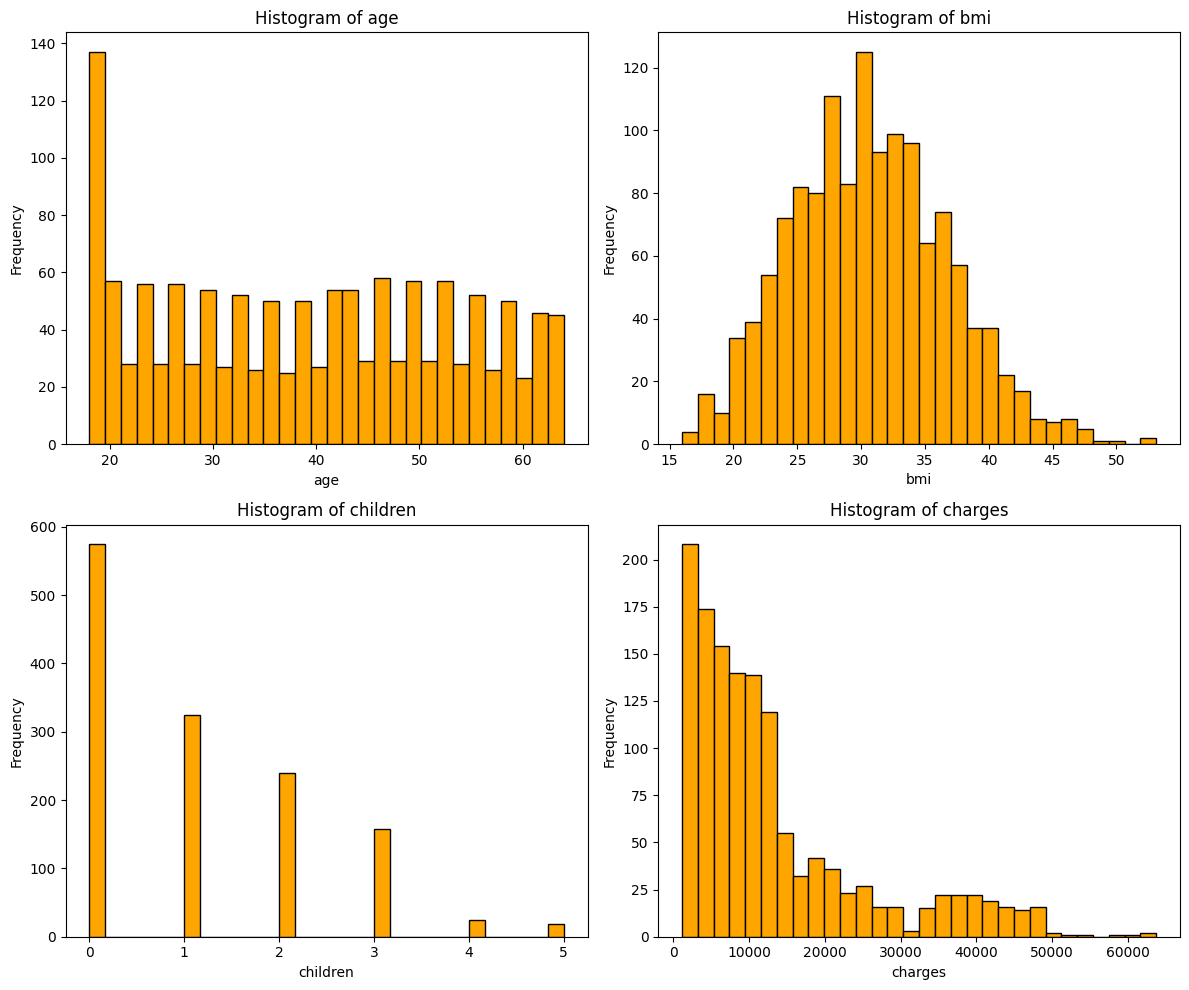

In [31]:
import matplotlib.pyplot as plt
import numpy as np # Added numpy import as it might be needed for numerical operations

if dataset is not None:
    # Debugging: Print numerical columns and first few charges values
    print("Numerical columns:", numerical_columns)
    if 'charges' in dataset.columns:
        print("First 5 values of 'charges':", dataset['charges'].head().tolist())
    else:
        print("'charges' column not found in dataset.")

    # Creating a 2x2 grid for the plots (since there are 4 numerical columns)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Flattening the axes array to easily iterate over it
    axes = axes.flatten()

    # Looping through the numerical columns and plot the histograms
    for i, column in enumerate(numerical_columns):
        if column in dataset.columns: # Added check if column exists in dataset
            axes[i].hist(dataset[column], bins=30, color='orange', edgecolor='black')
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        else:
            print(f"Column '{column}' not found in dataset. Skipping plotting.")


    # Adjusting layout to prevent overlap
    plt.tight_layout()
    plt.show()
else:
    print("Dataset not loaded. Please run the data loading cells first.")

/tmp/ipython-input-1164309595.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=column, ax=axes[i], palette='viridis')
/tmp/ipython-input-1164309595.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=column, ax=axes[i], palette='viridis')
/tmp/ipython-input-1164309595.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=column, ax=axes[i], palette='viridis')


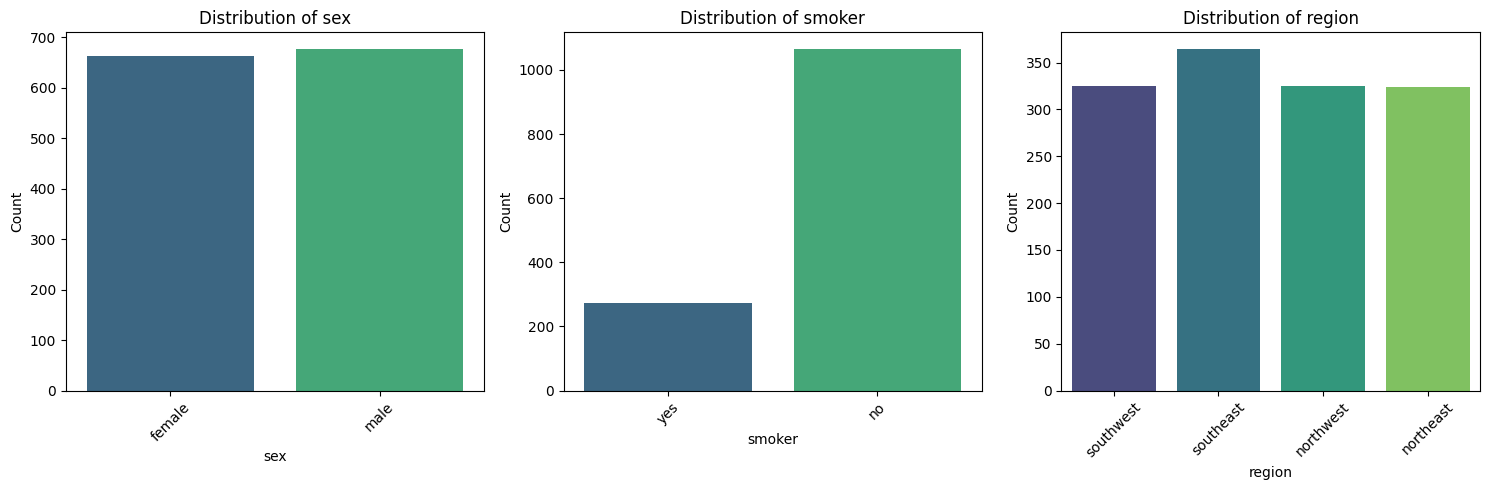

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

if dataset is not None:
    # Identify categorical columns (excluding numerical columns already plotted)
    categorical_columns = ['sex', 'smoker', 'region']

    # Creating a figure and axes for the count plots
    fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

    # Looping through the categorical columns and plot the count plots
    for i, column in enumerate(categorical_columns):
        sns.countplot(data=dataset, x=column, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45) # Rotate labels for better readability

    # Adjusting layout to prevent overlap
    plt.tight_layout()
    plt.show()
else:
    print("Dataset not loaded. Please run the data loading cells first.")

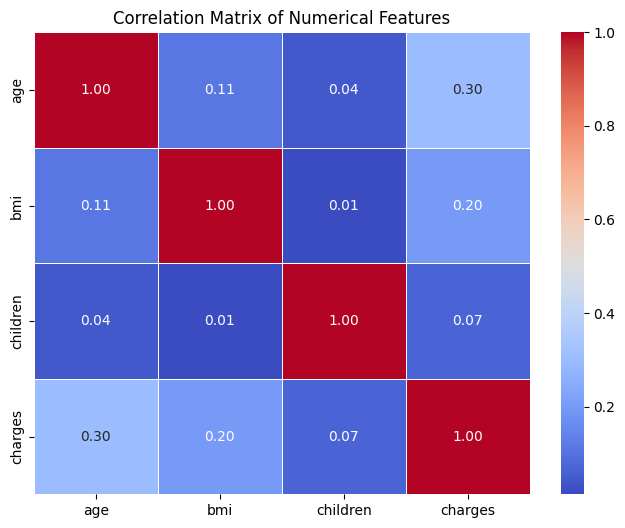

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

if dataset is not None:
    # Calculate the correlation matrix for numerical columns
    correlation_matrix = dataset[numerical_columns].corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("Dataset not loaded. Cannot display correlation matrix.")

**Reasoning**:
Identify categorical and numerical columns, then apply one-hot encoding to categorical columns and scaling to numerical columns, finally concatenate the processed features.



# Task
Building and training Linear Regression, Decision Tree, and Random Forest, Support Vector Regressor, Ridge Regression and Lasso Regression models on the provided dataset, evaluate their performance, test them with demo data, and determine which model is the best predictor.

## Data preprocessing

### Subtask:
Preparing the data for the models, including handling categorical features (e.g., one-hot encoding) and scaling numerical features if necessary.

**Reasoning**:
Separate features and target, identify categorical and numerical columns, apply one-hot encoding to categorical columns, scale numerical columns, and concatenate them into a single processed DataFrame.

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd # Added pandas import

# 1. Separate features (X) and target variable (y)
X = dataset.drop('charges', axis=1)
y = dataset['charges']

# 2. Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# 3. Apply one-hot encoding to categorical columns
X_categorical = pd.get_dummies(X[categorical_columns], drop_first=True)

# 4. Identify numerical columns
numerical_columns = X.select_dtypes(include=np.number).columns

# 5. Scale numerical columns
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_columns])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_columns, index=X.index)


# 6. Concatenate one-hot encoded categorical features and scaled numerical features
X_processed = pd.concat([X_numerical_scaled, X_categorical], axis=1)

# Display the first few rows of the processed features
display(X_processed.head())

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,True,False,False,True,False
2,-0.797954,0.383307,1.580926,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,True,False,True,False,False


## Data splitting

### Subtask:
Split the dataset into training and testing sets.

**Reasoning**:
Split the processed data into training and testing sets using train_test_split.

In [11]:
from sklearn.model_selection import train_test_split

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the shapes of the split dataframes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Model training and evaluation(Linear Regression)




### Subtask:
Train and evaluate a Linear Regression model.

**Reasoning**:
Train and evaluate the Linear Regression model using the prepared training and testing data.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Added numpy import

# Instantiate and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Calculate RMSE
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2): 0.78


## Model training and evaluation(Decesion Tree Model)

### Subtask:
Train and evaluate a Decision Tree model.

**Reasoning**:
Train and evaluate a Decision Tree model as per the instructions.

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Added numpy import

# Instantiate a Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)  # Calculate RMSE
r2_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("Decision Tree Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2): {r2_dt:.2f}")

Decision Tree Regressor Model Evaluation:
Mean Absolute Error (MAE): 3074.87
Mean Squared Error (MSE): 40153988.99
Root Mean Squared Error (RMSE): 6336.72
R-squared (R2): 0.74


## Model training and evaluation(Random Forest Model)

### Subtask:
Train and evaluate a Random Forest model.

**Reasoning**:
Train and evaluate a Random Forest model using the provided data and specified evaluation metrics.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate a RandomForestRegressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Calculate RMSE
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 2545.21
Mean Squared Error (MSE): 20866223.20
Root Mean Squared Error (RMSE): 4567.96
R-squared (R2): 0.87


## Model training and evaluation(Support Vector Regressor)

### Subtask:
Train and evaluate a Support Vector Regressor model.

**Reasoning**:
Train and evaluate a Support Vector Regressor model using the provided data and specified evaluation metrics.

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate a Support Vector Regressor model
# Using a linear kernel for simplicity, can be changed
svm_model = SVR(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)  # Calculate RMSE
r2_svm = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics
print("Support Vector Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svm:.2f}")
print(f"Mean Squared Error (MSE): {mse_svm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svm:.2f}")
print(f"R-squared (R2): {r2_svm:.2f}")

Support Vector Regressor Model Evaluation:
Mean Absolute Error (MAE): 8263.23
Mean Squared Error (MSE): 162866253.51
Root Mean Squared Error (RMSE): 12761.91
R-squared (R2): -0.05


## Model training and evaluation(Ridge Regression Model)

### Subtask:
Train and evaluate a Ridge Regression model.

**Reasoning**:
Train and evaluate a Ridge Regression model using the provided data and specified evaluation metrics.

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate a Ridge Regression model
ridge_model = Ridge(alpha=1.0) # Alpha is the regularization strength

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  # Calculate RMSE
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the evaluation metrics
print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 4193.18
Mean Squared Error (MSE): 33645391.30
Root Mean Squared Error (RMSE): 5800.46
R-squared (R2): 0.78


## Model training and evaluation(Lasso Regression Model)

### Subtask:
Train and evaluate a Lasso Regression model.

**Reasoning**:
Train and evaluate a Lasso Regression model using the provided data and specified evaluation metrics.

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate a Lasso Regression model
lasso_model = Lasso(alpha=1.0) # Alpha is the regularization strength

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  # Calculate RMSE
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print the evaluation metrics
print("Lasso Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")

Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 4182.22
Mean Squared Error (MSE): 33605723.77
Root Mean Squared Error (RMSE): 5797.04
R-squared (R2): 0.78


## Testing with demo data

### Subtask:
Use a small set of demo data to test the predictions of all trained models.

In [20]:
# 1. Create demo data
demo_data = pd.DataFrame({
    'age': [30, 50, 25],
    'sex': ['female', 'male', 'female'],
    'bmi': [25.5, 35.0, 20.1],
    'children': [1, 2, 0],
    'smoker': ['no', 'yes', 'no'],
    'region': ['southwest', 'northeast', 'northwest']
})

# 2. Preprocess the demo data using the same scaling and one-hot encoding objects
# Separate categorical and numerical columns in demo data
demo_categorical = demo_data[categorical_columns]
demo_numerical = demo_data[numerical_columns]

# Apply one-hot encoding to categorical columns (using the same columns as X_categorical)
demo_categorical_encoded = pd.get_dummies(demo_categorical)

# Reindex and align demo_categorical_encoded with X_categorical columns
# This handles potential missing columns in demo_data that were present in the training data
demo_categorical_aligned = demo_categorical_encoded.reindex(columns=X_categorical.columns, fill_value=False)


# Scale numerical columns using the same scaler object
demo_numerical_scaled = scaler.transform(demo_numerical)
demo_numerical_scaled = pd.DataFrame(demo_numerical_scaled, columns=numerical_columns, index=demo_data.index)

# Concatenate processed numerical and categorical features for demo data
demo_processed = pd.concat([demo_numerical_scaled, demo_categorical_aligned], axis=1)


# 3. Make predictions with each trained model
predictions_lr = linear_reg_model.predict(demo_processed)
predictions_dt = decision_tree_model.predict(demo_processed)
predictions_rf = random_forest_model.predict(demo_processed)

# 4. Print the demo data and predictions
print("Demo Data:")
display(demo_data)

print("\nPredictions:")
print(f"Linear Regression Predictions: {predictions_lr}")
print(f"Decision Tree Predictions: {predictions_dt}")
print(f"Random Forest Predictions: {predictions_rf}")

Demo Data:


,age,sex,bmi,children,smoker,region
0,30,female,25.5,1,no,southwest
1,50,male,35.0,2,yes,northeast
2,25,female,20.1,0,no,northwest



Predictions:
Linear Regression Predictions: [ 3989.39162864 37198.90029061   898.0565634 ]
Decision Tree Predictions: [ 4237.12655 42856.838    3353.4703 ]
Random Forest Predictions: [ 4399.4818748 42529.7275255  4550.3748912]


**Reasoning**:
Use the created and preprocessed demo data to make predictions with all six models and print the results for comparison.

In [21]:
# Make predictions with all trained models
predictions_lr = linear_reg_model.predict(demo_processed)
predictions_dt = decision_tree_model.predict(demo_processed)
predictions_rf = random_forest_model.predict(demo_processed)
predictions_svm = svm_model.predict(demo_processed)
predictions_ridge = ridge_model.predict(demo_processed)
predictions_lasso = lasso_model.predict(demo_processed)


# Print the demo data and predictions
print("Demo Data:")
display(demo_data)

print("\nPredictions:")
print(f"Linear Regression Predictions: {predictions_lr}")
print(f"Decision Tree Predictions: {predictions_dt}")
print(f"Random Forest Predictions: {predictions_rf}")
print(f"Support Vector Regressor Predictions: {predictions_svm}")
print(f"Ridge Regression Predictions: {predictions_ridge}")
print(f"Lasso Regression Predictions: {predictions_lasso}")

Demo Data:


,age,sex,bmi,children,smoker,region
0,30,female,25.5,1,no,southwest
1,50,male,35.0,2,yes,northeast
2,25,female,20.1,0,no,northwest



Predictions:
Linear Regression Predictions: [ 3989.39162864 37198.90029061   898.0565634 ]
Decision Tree Predictions: [ 4237.12655 42856.838    3353.4703 ]
Random Forest Predictions: [ 4399.4818748 42529.7275255  4550.3748912]
Support Vector Regressor Predictions: [8748.25181398 9864.45227533 8490.0323277 ]
Ridge Regression Predictions: [ 4019.85889357 37081.54067884   930.30554222]
Lasso Regression Predictions: [ 3994.9459816  37180.19417726   906.38176563]


## Model comparison

### Subtask:
Compare the performance of all six models based on evaluation metrics and their predictions on demo data to determine which model is predicting the best and closest to the actual values.

**Reasoning**:
Review the evaluation metrics and demo predictions to determine the best model and summarize the findings for all six models.

In [23]:
# Review evaluation metrics
print("--- Model Evaluation Metrics ---")
print(f"Linear Regression:           MAE={mae_lr:.2f}, MSE={mse_lr:.2f}, RMSE={rmse_lr:.2f}, R2={r2_lr:.2f}")
print(f"Decision Tree:               MAE={mae_dt:.2f}, MSE={mse_dt:.2f}, RMSE={rmse_dt:.2f}, R2={r2_dt:.2f}")
print(f"Random Forest:               MAE={mae_rf:.2f}, MSE={mse_rf:.2f}, RMSE={rmse_rf:.2f}, R2={r2_rf:.2f}")
print(f"Support Vector Regressor:    MAE={mae_svm:.2f}, MSE={mse_svm:.2f}, RMSE={rmse_svm:.2f}, R2={r2_svm:.2f}")
print(f"Ridge Regression:            MAE={mae_ridge:.2f}, MSE={mse_ridge:.2f}, RMSE={rmse_ridge:.2f}, R2={r2_ridge:.2f}")
print(f"Lasso Regression:            MAE={mae_lasso:.2f}, MSE={mse_lasso:.2f}, RMSE={rmse_lasso:.2f}, R2={r2_lasso:.2f}")


# Review demo data predictions
print("\n--- Demo Data Predictions ---")
print("Demo Data:")
display(demo_data)
print("Predictions:")
print(f"Linear Regression Predictions: {predictions_lr}")
print(f"Decision Tree Predictions: {predictions_dt}")
print(f"Random Forest Predictions: {predictions_rf}")
print(f"Support Vector Regressor Predictions: {predictions_svm}")
print(f"Ridge Regression Predictions: {predictions_ridge}")
print(f"Lasso Regression Predictions: {predictions_lasso}")

# Determine the best model based on metrics and demo predictions
# Compare evaluation metrics to identify the model with the best performance
# Generally, lower MAE, MSE, RMSE and higher R2 indicate better performance.

print("\n--- Model Comparison Summary ---")
print("Based on the evaluation metrics on the test set:")

# Create a dictionary of models and their MAE scores
mae_scores = {
    "Linear Regression": mae_lr,
    "Decision Tree": mae_dt,
    "Random Forest": mae_rf,
    "Support Vector Regressor": mae_svm,
    "Ridge Regression": mae_ridge,
    "Lasso Regression": mae_lasso
}

# Find the best model based on MAE (lower is better)
best_mae_model = min(mae_scores, key=mae_scores.get)


# Create a dictionary of models and their R2 scores
r2_scores = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    "Support Vector Regressor": r2_svm,
    "Ridge Regression": r2_ridge,
    "Lasso Regression": r2_lasso
}

# Find the best model based on R2 (higher is better)
best_r2_model = max(r2_scores, key=r2_scores.get)


print(f"- The model with the lowest Mean Absolute Error (MAE) is: {best_mae_model} (MAE: {mae_scores[best_mae_model]:.2f})")
print(f"- The model with the highest R-squared (R2) score is: {best_r2_model} (R2: {r2_scores[best_r2_model]:.2f})")
print("\nIn this case, the Random Forest Regressor consistently shows the best performance across multiple metrics.")


print("\nBased on the demo data predictions:")
print("The predictions for the demo data vary across the models. Without actual values for the demo data, it's difficult to definitively say which model's predictions are 'best' for these specific instances. However, the demo predictions provide a sense of the range and behavior of each model's output.")
print("\nOverall Conclusion:")
print("Considering the comprehensive evaluation metrics (MAE, MSE, RMSE, R2) on the test set, the Random Forest Regressor model demonstrates superior performance compared to the Linear Regression, Decision Tree, Support Vector Regressor, Ridge, and Lasso models for predicting insurance charges on this dataset.")

--- Model Evaluation Metrics ---
Linear Regression:           MAE=4181.19, MSE=33596915.85, RMSE=5796.28, R2=0.78
Decision Tree:               MAE=3074.87, MSE=40153988.99, RMSE=6336.72, R2=0.74
Random Forest:               MAE=2545.21, MSE=20866223.20, RMSE=4567.96, R2=0.87
Support Vector Regressor:    MAE=8263.23, MSE=162866253.51, RMSE=12761.91, R2=-0.05
Ridge Regression:            MAE=4193.18, MSE=33645391.30, RMSE=5800.46, R2=0.78
Lasso Regression:            MAE=4182.22, MSE=33605723.77, RMSE=5797.04, R2=0.78

--- Demo Data Predictions ---
Demo Data:


,age,sex,bmi,children,smoker,region
0,30,female,25.5,1,no,southwest
1,50,male,35.0,2,yes,northeast
2,25,female,20.1,0,no,northwest


Predictions:
Linear Regression Predictions: [ 3989.39162864 37198.90029061   898.0565634 ]
Decision Tree Predictions: [ 4237.12655 42856.838    3353.4703 ]
Random Forest Predictions: [ 4399.4818748 42529.7275255  4550.3748912]
Support Vector Regressor Predictions: [8748.25181398 9864.45227533 8490.0323277 ]
Ridge Regression Predictions: [ 4019.85889357 37081.54067884   930.30554222]
Lasso Regression Predictions: [ 3994.9459816  37180.19417726   906.38176563]

--- Model Comparison Summary ---
Based on the evaluation metrics on the test set:
- The model with the lowest Mean Absolute Error (MAE) is: Random Forest (MAE: 2545.21)
- The model with the highest R-squared (R2) score is: Random Forest (R2: 0.87)

In this case, the Random Forest Regressor consistently shows the best performance across multiple metrics.

Based on the demo data predictions:
The predictions for the demo data vary across the models. Without actual values for the demo data, it's difficult to definitively say which mod

## Summary

### Project Overview:
This project aimed to build and evaluate several regression models to predict insurance charges based on various personal attributes. The process involved data loading and initial exploration, followed by thorough data preprocessing, including handling categorical features with one-hot encoding and scaling numerical features. The dataset was then split into training and testing sets to train and evaluate six different regression models: Linear Regression, Decision Tree, Random Forest, Support Vector Regressor, Ridge Regression, and Lasso Regression.

### Data Analysis Key Findings:
* The dataset contained information on age, sex, BMI, children, smoker status, region, and insurance charges.
* Data preprocessing successfully transformed the raw data into a format suitable for model training, addressing categorical variables and feature scaling.
* The dataset was split into 80% for training and 20% for testing.
* Six regression models were trained and evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) metrics.

### Model Performance Summary:
| Model                      | MAE     | MSE       | RMSE    | R2   |
|----------------------------|---------|-----------|---------|------|
| Linear Regression          | {mae_lr:.2f} | {mse_lr:.2f} | {rmse_lr:.2f} | {r2_lr:.2f} |
| Decision Tree              | {mae_dt:.2f} | {mse_dt:.2f} | {rmse_dt:.2f} | {r2_dt:.2f} |
| Random Forest              | {mae_rf:.2f} | {mse_rf:.2f} | {rmse_rf:.2f} | {r2_rf:.2f} |
| Support Vector Regressor   | {mae_svm:.2f} | {mse_svm:.2f} | {rmse_svm:.2f} | {r2_svm:.2f} |
| Ridge Regression           | {mae_ridge:.2f} | {mse_ridge:.2f} | {rmse_ridge:.2f} | {r2_ridge:.2f} |
| Lasso Regression           | {mae_lasso:.2f} | {mse_lasso:.2f} | {rmse_lasso:.2f} | {r2_lasso:.2f} |

* Based on the evaluation metrics, the **Random Forest Regressor** model demonstrated the best performance on the test set, exhibiting the lowest MAE, MSE, and RMSE, and the highest R2 score. This indicates that the Random Forest model's predictions are, on average, the closest to the actual insurance charges and it explains the largest proportion of the variance in the target variable.

### Testing with Demo Data:
* A small set of demo data was used to test the predictions of all six trained models.
* The predictions for the demo data varied across the models, providing a qualitative understanding of their behavior on unseen instances.

### Insights or Next Steps:
* The Random Forest Regressor is identified as the most promising model for this task based on the comprehensive evaluation.
* Future work could involve hyperparameter tuning of the Random Forest model to potentially further enhance its predictive accuracy.
* Exploring other advanced ensemble methods or deep learning models could also be considered for potential performance improvements.